**reference:** [Most useful Python functions for Time Series Analysis](https://towardsdatascience.com/most-useful-python-functions-for-time-series-analysis-ed1a9cb3aa8b)

**Properties Of a Time Series Data**

- **Trends** show the general tendency of the data to increase or decrease during a long period of time. Generally, a trend is a smooth, general, long-term, average tendency.
- **Seasonality**: refers to periodic fluctuations. For example, electricity consumption is high during the day and low during the night, similarly online sales go up during Christmas before going down again.
- **Stationarity** is a key characteristic of the time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has **constant mean and variance**, and covariance is independent of time. i.e. A Stock price is not a stationary series, since we might see a growing or decreasing trend and its volatility might increase over time(meaning that variance is changing).

Ideally, we want to have a **stationary** time series for modelling. In real-world scenarios, not all of them are stationary, but we can make different transformations to make them stationary.

# data import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(30, 12)})
sns.set_style("darkgrid")

In [5]:
cwd = os.getcwd()
f_d = '/data/DATA_CME_S1_22012021.csv'

In [8]:
d = pd.read_csv(cwd+f_d)

df = d[['Date', 'Settle']]
df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
df = df[df.loc[:,'Date'] >= '2010-01-01']

df.index = df['Date']
df=df.drop(["Date"],axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [24]:
df.head()

,Settle
Date,
2021-01-21,1370.25
2021-01-20,1369.50
2021-01-19,1385.75
2021-01-15,1416.75
2021-01-14,1436.50


# Visualization with Slider

In [25]:
import plotly.express as px

fig=px.line(df, x=df.index, y='Settle', title='Settle with Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Methods to Check Stationarity

**ADF test** is the most commonly used test the Stationarity of the series, where the null hypothesis is the time series possesses a unit root and is non-stationary. So if the p-Value in ADH test is less than the significance level (0.05) we reject the null hypothesis.

- **Null Hypothesis**: The series has a unit root (value of a =1)
- **Alternate Hypothesis**: The series has no unit root.

**KPSS((Kwiatkowski-Phillips-Schmidt-Shin) test** is another test for checking the stationarity of a time series.

- **Null Hypothesis**: The process is trend stationery.
- **Alternate Hypothesis**: The series has a unit root (series is not stationary).

In [14]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Settle'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# KPSS Test
stats, p, lags, critical_values = kpss(df['Settle'], 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')

ADF Statistic: -2.101713667568431
p-value: 0.24382608573297515
Series is not Stationary
KPSS Test Statistics: 0.6801227784546395
p-value: 0.01
Series is not Stationary


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




# Autocorrelation

Autocorrelation is important because it can help us discover patterns in our time series, successfully select the best modelling algorithm, correctly evaluate the effectiveness of our model. Specifically, autocorrelation and partial autocorrelation plots are heavily used to summarize the strength and relationship within observations in a time series with observations at prior time steps.

When there is a strong seasonal pattern, we can see in the ACF plot usually defined repeated spikes at the multiples of the seasonal window. For instance in most “monthly sales time series ” you should be able to see spikes at around at 12th, 24th, 36th.. lines explaining the rise of sales with the advent of Christmas holidays.

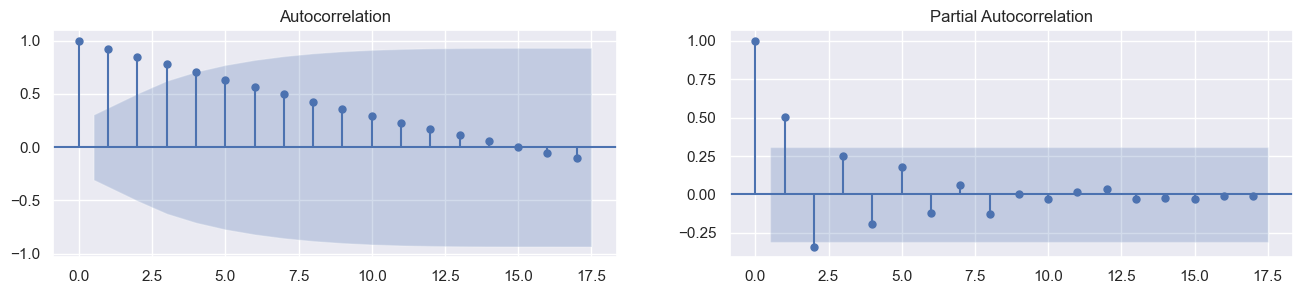

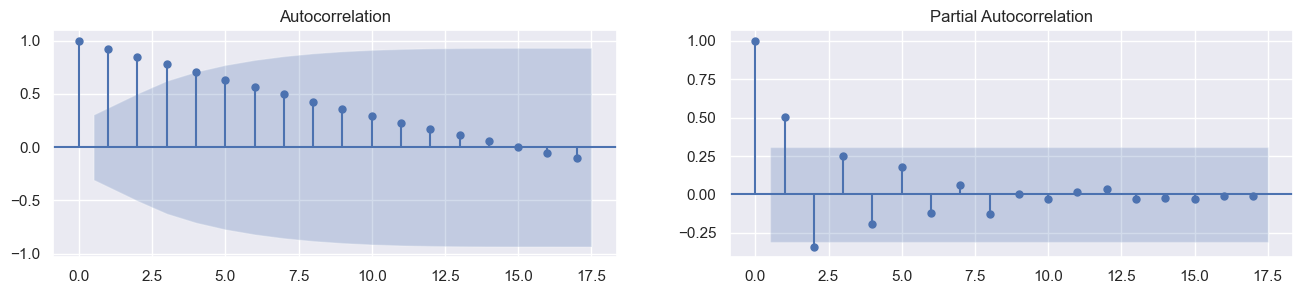

In [38]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Calculate ACF and PACF
acf = acf(df)
pacf = pacf(df)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(acf, ax=axes[0])
plot_pacf(pacf, ax=axes[1])

# Decomposition

Any time series may be split into the following components:

- Base Level
- Trend
- Seasonality
- Error

In [43]:
df.index = pd.DatetimeIndex(df.index)
df.sort_index(inplace=True)
df.head()

,Settle
Date,
2010-01-04,1049.50
2010-01-05,1052.25
2010-01-06,1050.50
2010-01-07,1017.75
2010-01-08,1013.00


Text(0.5, 0.98, 'Additive Decompose')

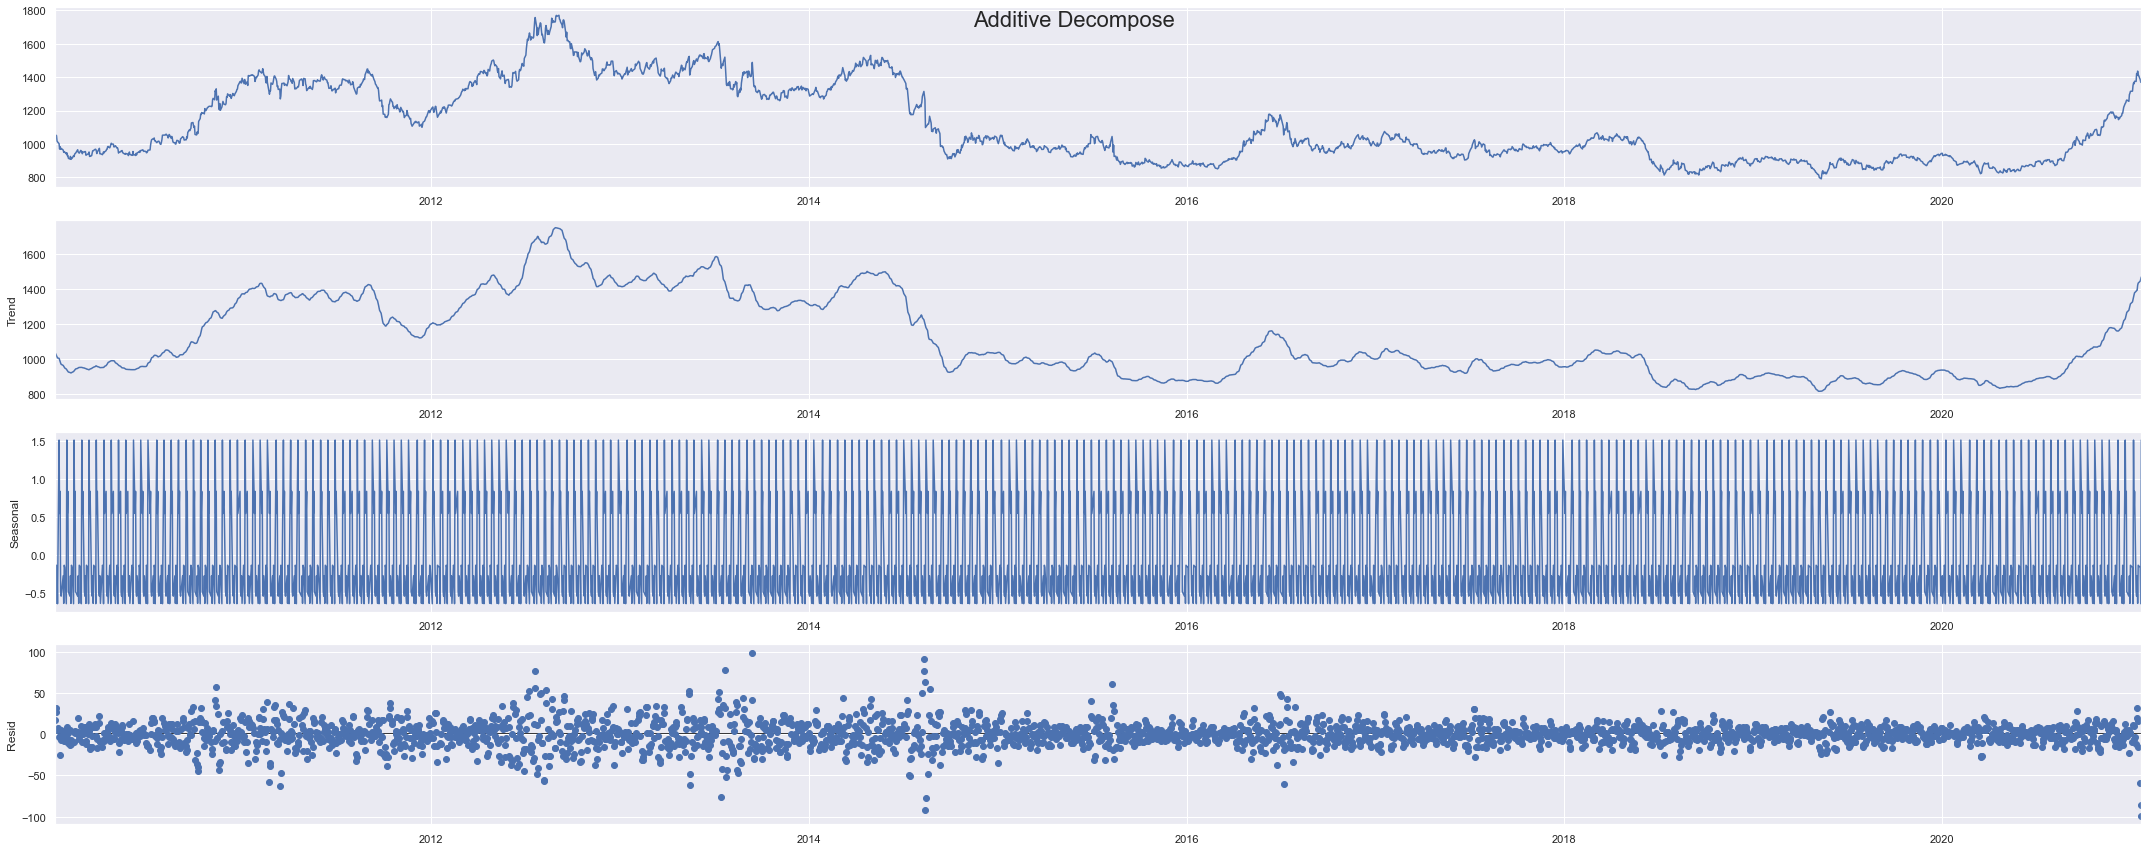

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
result_add = seasonal_decompose(df, model='additive', extrapolate_trend='freq', period=10)
# Plot
result_add.plot().suptitle('Additive Decompose', fontsize=22)

# Extracting the Components

In [53]:
# Extract the Components ----
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['Seasonality', 'Trend', 'Residual', 'Actual_values']
df_reconstructed.head()

,Seasonality,Trend,Residual,Actual_values
Date,,,,
2010-01-04,-0.276042,1032.014621,17.761420,1049.50
2010-01-05,-0.639620,1025.417424,27.472196,1052.25
2010-01-06,-0.137106,1018.820227,31.816879,1050.50
2010-01-07,-0.167746,1012.223030,5.694715,1017.75
2010-01-08,-0.643860,1005.625833,8.018027,1013.00


# Resampling

The `df.resample()` function let us resample our time series to our desired frequencies: A number of string aliases are given to use common time series frequencies, these are referred as offset aliases. Let’s have a look at a few resamplings using these offset aliases.

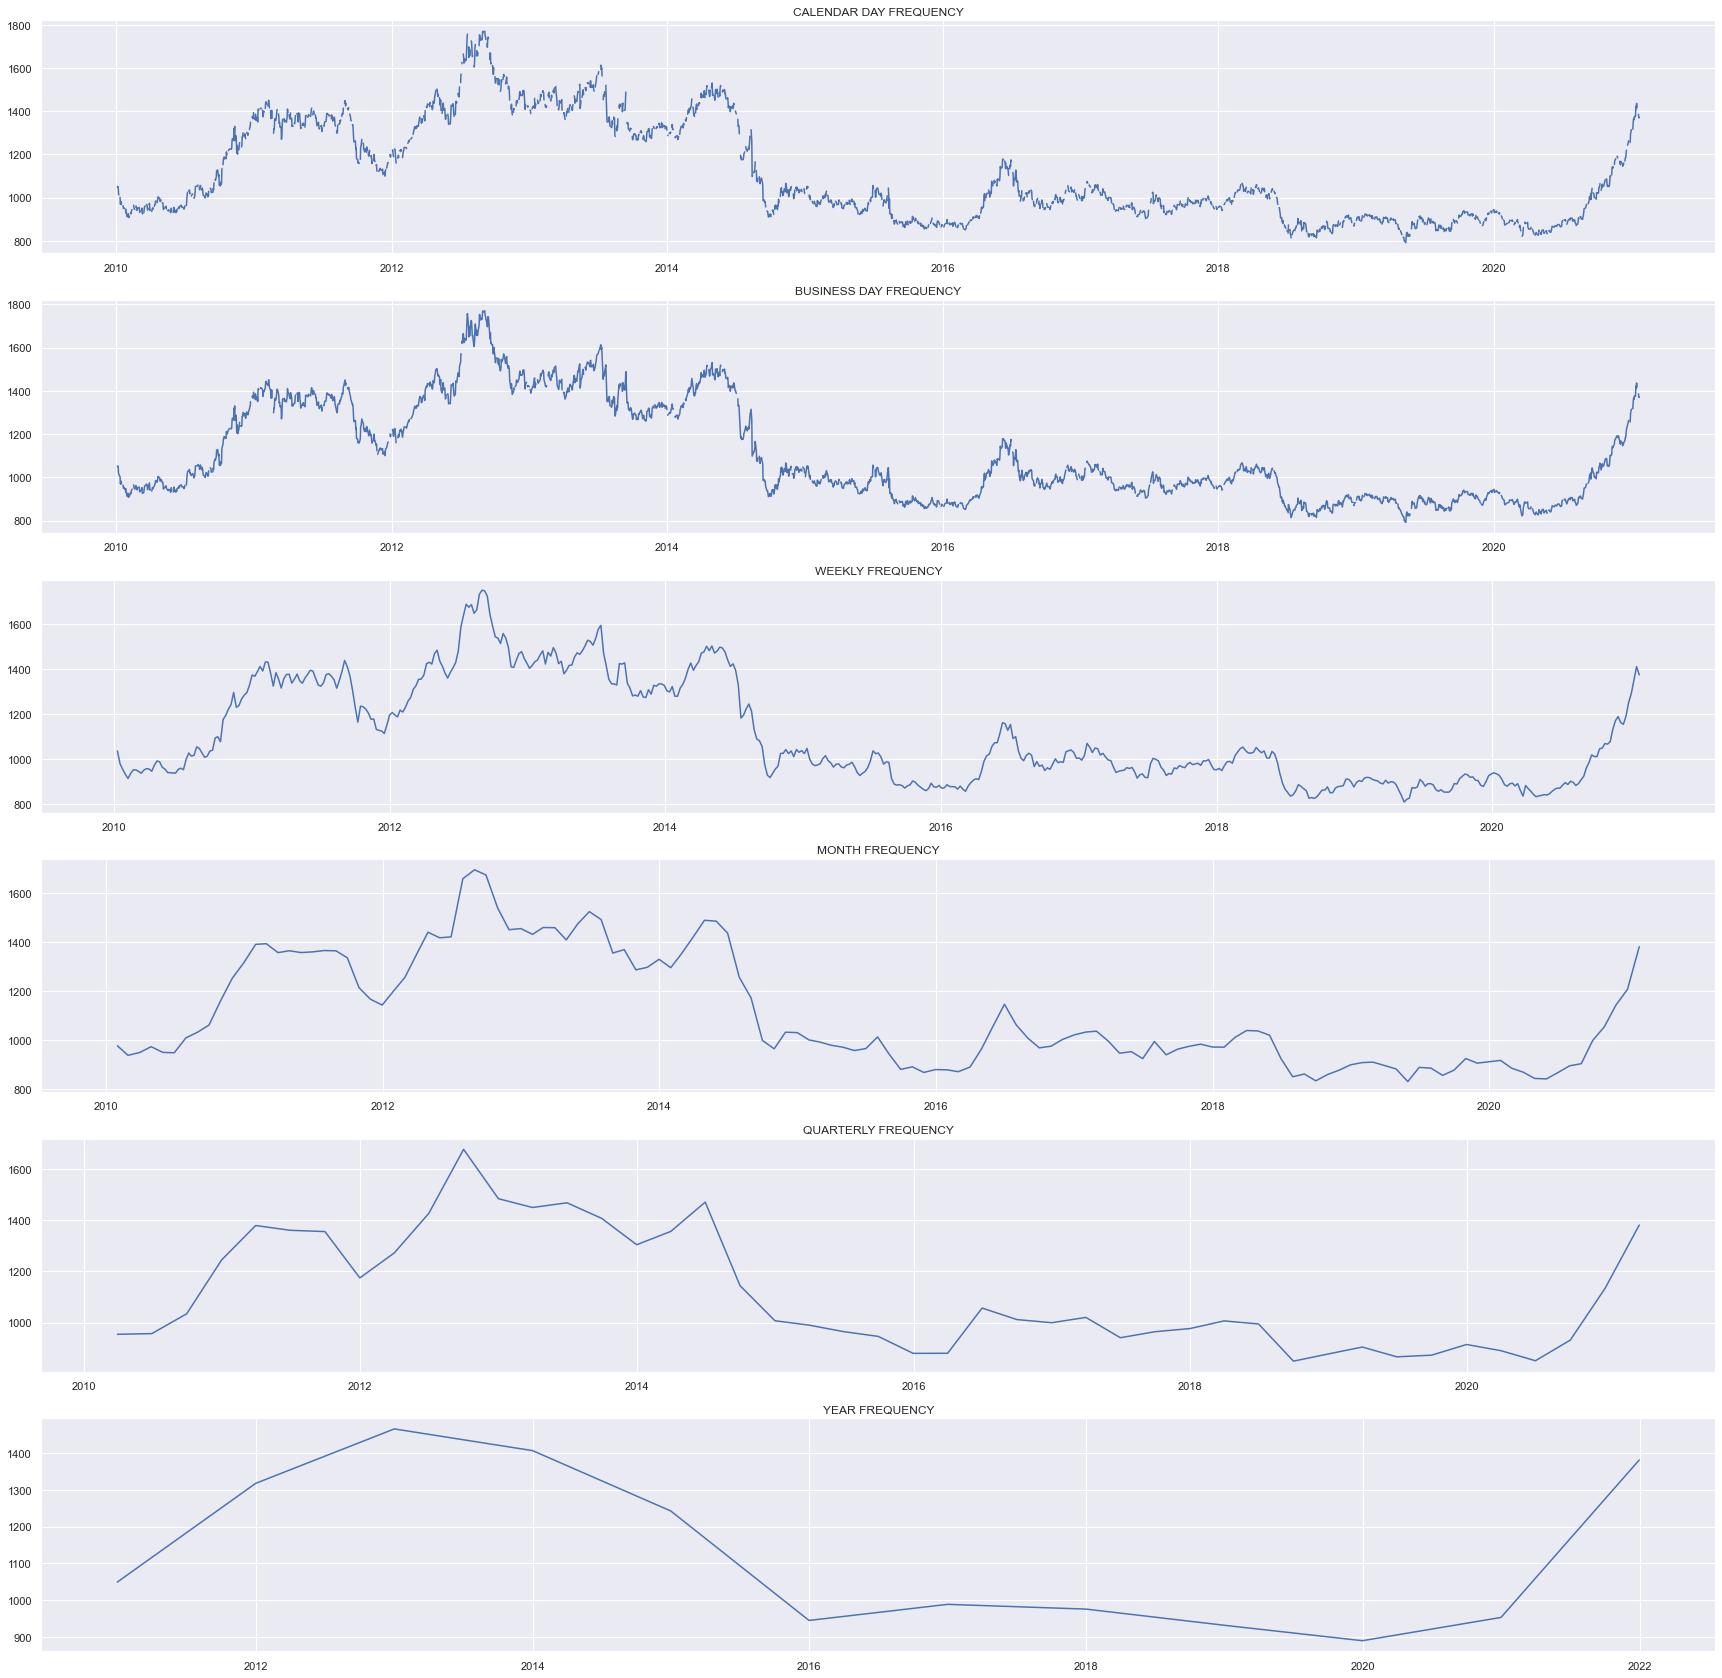

In [54]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,figsize=(30,30))

ax1.plot(df.resample('D').mean())
ax1.set_title('CALENDAR DAY FREQUENCY');

ax2.plot(df.resample('B').mean())
ax2.set_title('BUSINESS DAY FREQUENCY');

ax3.plot(df.resample('W').mean())
ax3.set_title('WEEKLY FREQUENCY');

ax4.plot(df.resample('M').mean())
ax4.set_title('MONTH FREQUENCY');

ax5.plot(df.resample('Q').mean())
ax5.set_title('QUARTERLY FREQUENCY');

ax6.plot(df.resample('A').mean())
ax6.set_title('YEAR FREQUENCY');

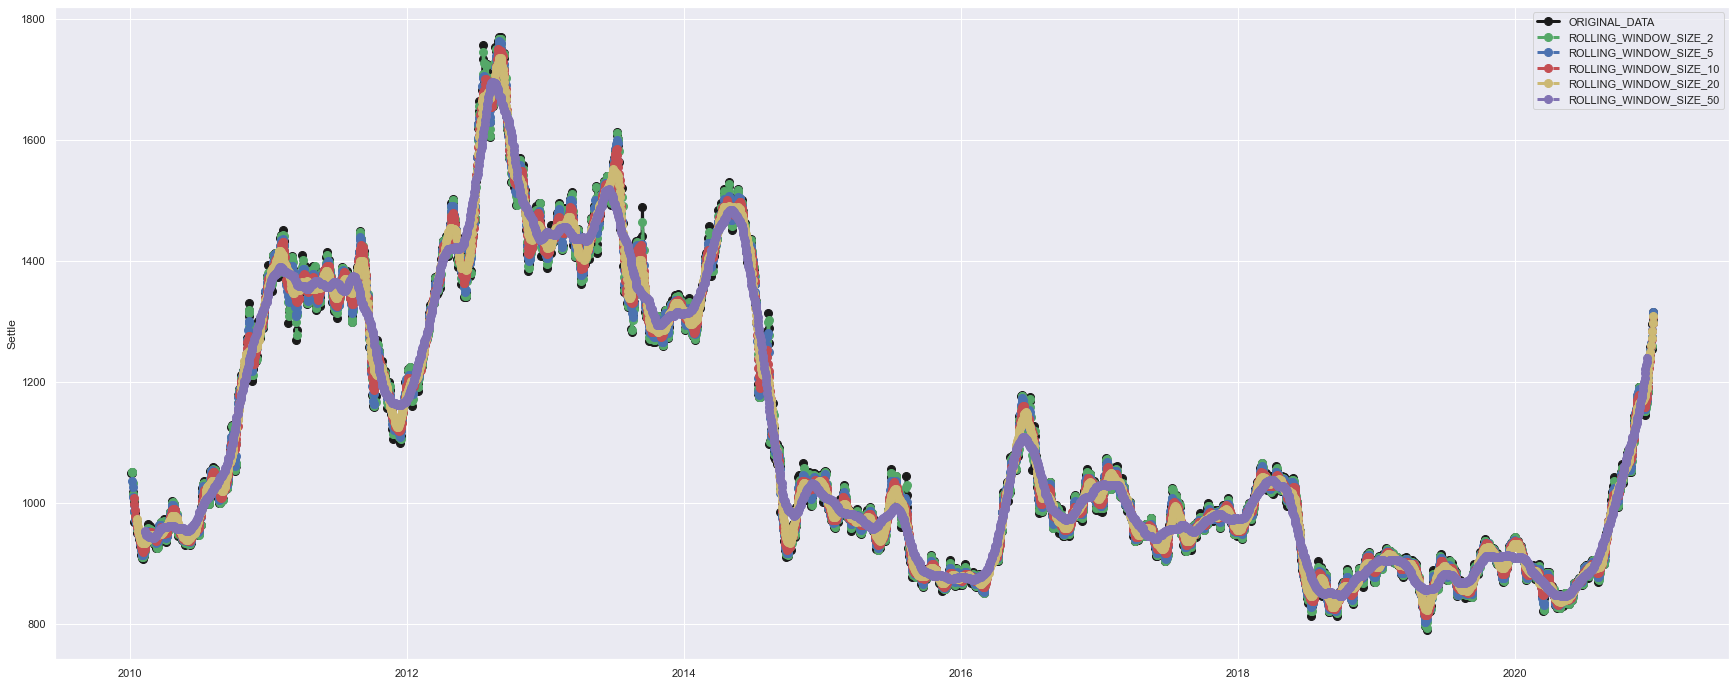

In [57]:
start, end = '2010-01-01', '2021-01-01'

fig, ax = plt.subplots()

ax.plot(df.loc[start:end],
marker='o', markersize=8, linestyle='-', label='ORIGINAL_DATA',linewidth=3,color='k')

ax.plot(df.rolling(window=2,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_2',linewidth=3,color='g')

ax.plot(df.rolling(window=5,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_5',linewidth=3,color='b')

ax.plot(df.rolling(window=10,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_10',linewidth=3,color='r')

ax.plot(df.rolling(window=20,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_20',linewidth=3,color='y')

ax.plot(df.rolling(window=50,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_50',linewidth=3,color='m')


ax.set_ylabel('Settle')
ax.legend()

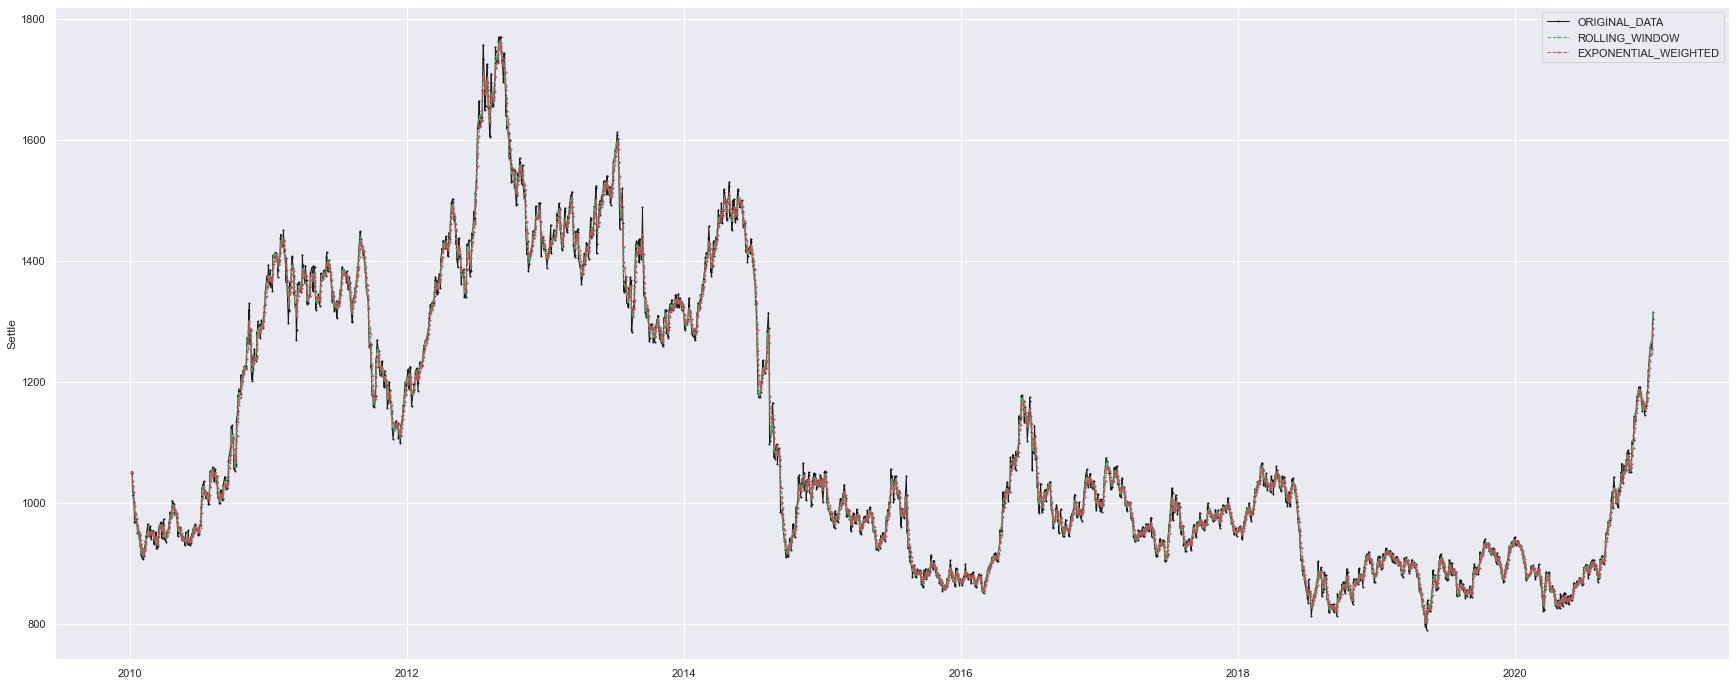

In [61]:
start, end = '2010-01-01', '2021-01-01'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end],
marker='o', linestyle='-', linewidth=1, label='ORIGINAL_DATA',markersize=1, color='k')

ax.plot(df.rolling(window=5,center=True).mean().loc[start:end],
marker='o', markersize=1, linestyle='--', label='ROLLING_WINDOW',linewidth=1,color='g')

ax.plot(df.ewm(span=5).mean().loc[start:end],
marker='o', linestyle='--', label='EXPONENTIAL_WEIGHTED',linewidth=1, markersize=1,color='r')
ax.set_ylabel('Settle')
ax.legend()